In [111]:
import pandas as pd

In [112]:
lawinen_set = pd.read_csv('newData/gesamt_set.csv', sep=',')

In [113]:
lawinen_set['ID'] = lawinen_set['ID'].fillna(0)
lawinen_set

,Datum,Intervall,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,...,ZEIT,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude
0,1992-01-02 00:00:00,1991/ 1992,0.0,120.0,149.416342,0.0,1.7,13.6,-22.8,3.6,...,NaN,NaN,NaN,0.0,289.799832,43.139100,7.520000,0.000000,66.696100,2068.983200
1,1992-01-03 00:00:00,1991/ 1992,0.0,120.0,144.796380,0.0,2.4,19.2,6.8,6.7,...,NaN,NaN,NaN,0.0,244.234903,36.921650,4.456625,13.363050,52.843300,2423.385125
2,1992-01-04 00:00:00,1991/ 1992,0.0,114.0,134.216336,0.0,-5.9,-47.2,9.6,-6.3,...,NaN,NaN,NaN,0.0,100.903722,46.236500,9.020862,13.071088,66.327800,1472.435275
3,1992-01-05 00:00:00,1991/ 1992,0.0,110.0,131.490474,2.9,-1.0,-8.0,-23.6,-1.8,...,NaN,NaN,NaN,0.0,296.268658,39.920758,7.472500,6.785733,63.766642,2443.633433
4,1992-01-06 00:00:00,1991/ 1992,0.0,107.0,129.696970,0.0,-4.0,-32.0,-4.0,-0.5,...,NaN,NaN,NaN,0.0,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lockerschneelawine trocken,mittel,34.0,281.076869,43.656950,4.415100,32.175950,52.052100,1944.962150
6543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lockerschneelawine trocken,mittel,28.0,275.521754,42.587179,7.489589,3.416216,71.133684,2555.368779
6544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Schneebrettlawine naß und trocken,gross,6.0,298.144745,41.673113,7.147100,0.000000,65.409112,2735.163400
6545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1899-12-30 14:25:00,Schneebrettlawinen naß,gross,10.0,267.169200,43.175288,6.860250,11.513050,65.976500,2978.152008


<AxesSubplot:>

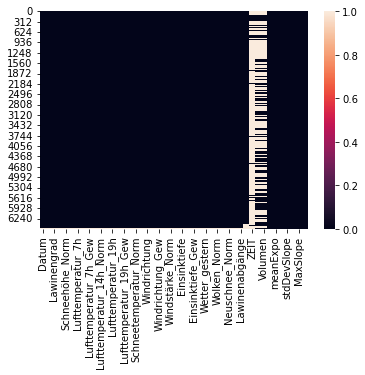

In [114]:
import seaborn as sns

sns.heatmap(lawinen_set.isna())

In [115]:
from sklearn import tree

lawinen_set = lawinen_set.drop(['Datum', 'Intervall', 'ZEIT', ], axis=1)

lawinen_set['Lawinen_Art'] = pd.factorize(lawinen_set['Lawinen_Art'])[0]
lawinen_set['Volumen'] = pd.factorize(lawinen_set['Volumen'])[0]
lawinen_set['Distanz'] = lawinen_set['Distanz'].fillna(0)
lawinen_set.dropna(inplace=True)
lawinen_set

,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,...,Distanz,Lawinen_Art,Volumen,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude
0,0.0,120.0,149.416342,0.0,1.7,13.6,-22.8,3.6,28.8,3.6,...,54.063925,-1,-1,0.0,289.799832,43.139100,7.520000,0.000000,66.696100,2068.983200
1,0.0,120.0,144.796380,0.0,2.4,19.2,6.8,6.7,53.6,14.4,...,56.206388,-1,-1,0.0,244.234903,36.921650,4.456625,13.363050,52.843300,2423.385125
2,0.0,114.0,134.216336,0.0,-5.9,-47.2,9.6,-6.3,-50.4,26.8,...,55.604644,-1,-1,0.0,100.903722,46.236500,9.020862,13.071088,66.327800,1472.435275
3,0.0,110.0,131.490474,2.9,-1.0,-8.0,-23.6,-1.8,-14.4,-25.2,...,59.352300,-1,-1,0.0,296.268658,39.920758,7.472500,6.785733,63.766642,2443.633433
4,0.0,107.0,129.696970,0.0,-4.0,-32.0,-4.0,-0.5,-4.0,-7.2,...,57.136368,-1,-1,0.0,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,...,0.000000,0,1,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053
6509,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,...,0.000000,-1,-1,0.0,2.980625,37.066700,6.003100,13.586900,50.025850,1967.563900
6510,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,...,0.000000,-1,-1,0.0,283.997544,43.051267,7.684350,0.000000,63.395533,1636.832367
6511,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,...,0.000000,-1,-1,0.0,100.903722,46.236500,9.020862,13.071088,66.327800,1472.435275


<AxesSubplot:>

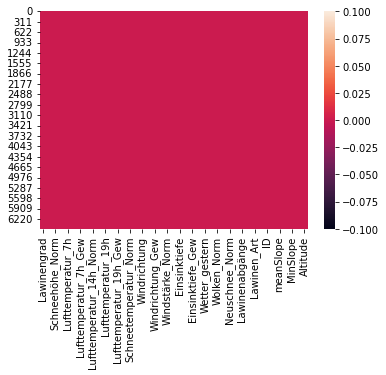

In [116]:
sns.heatmap(lawinen_set.isna())

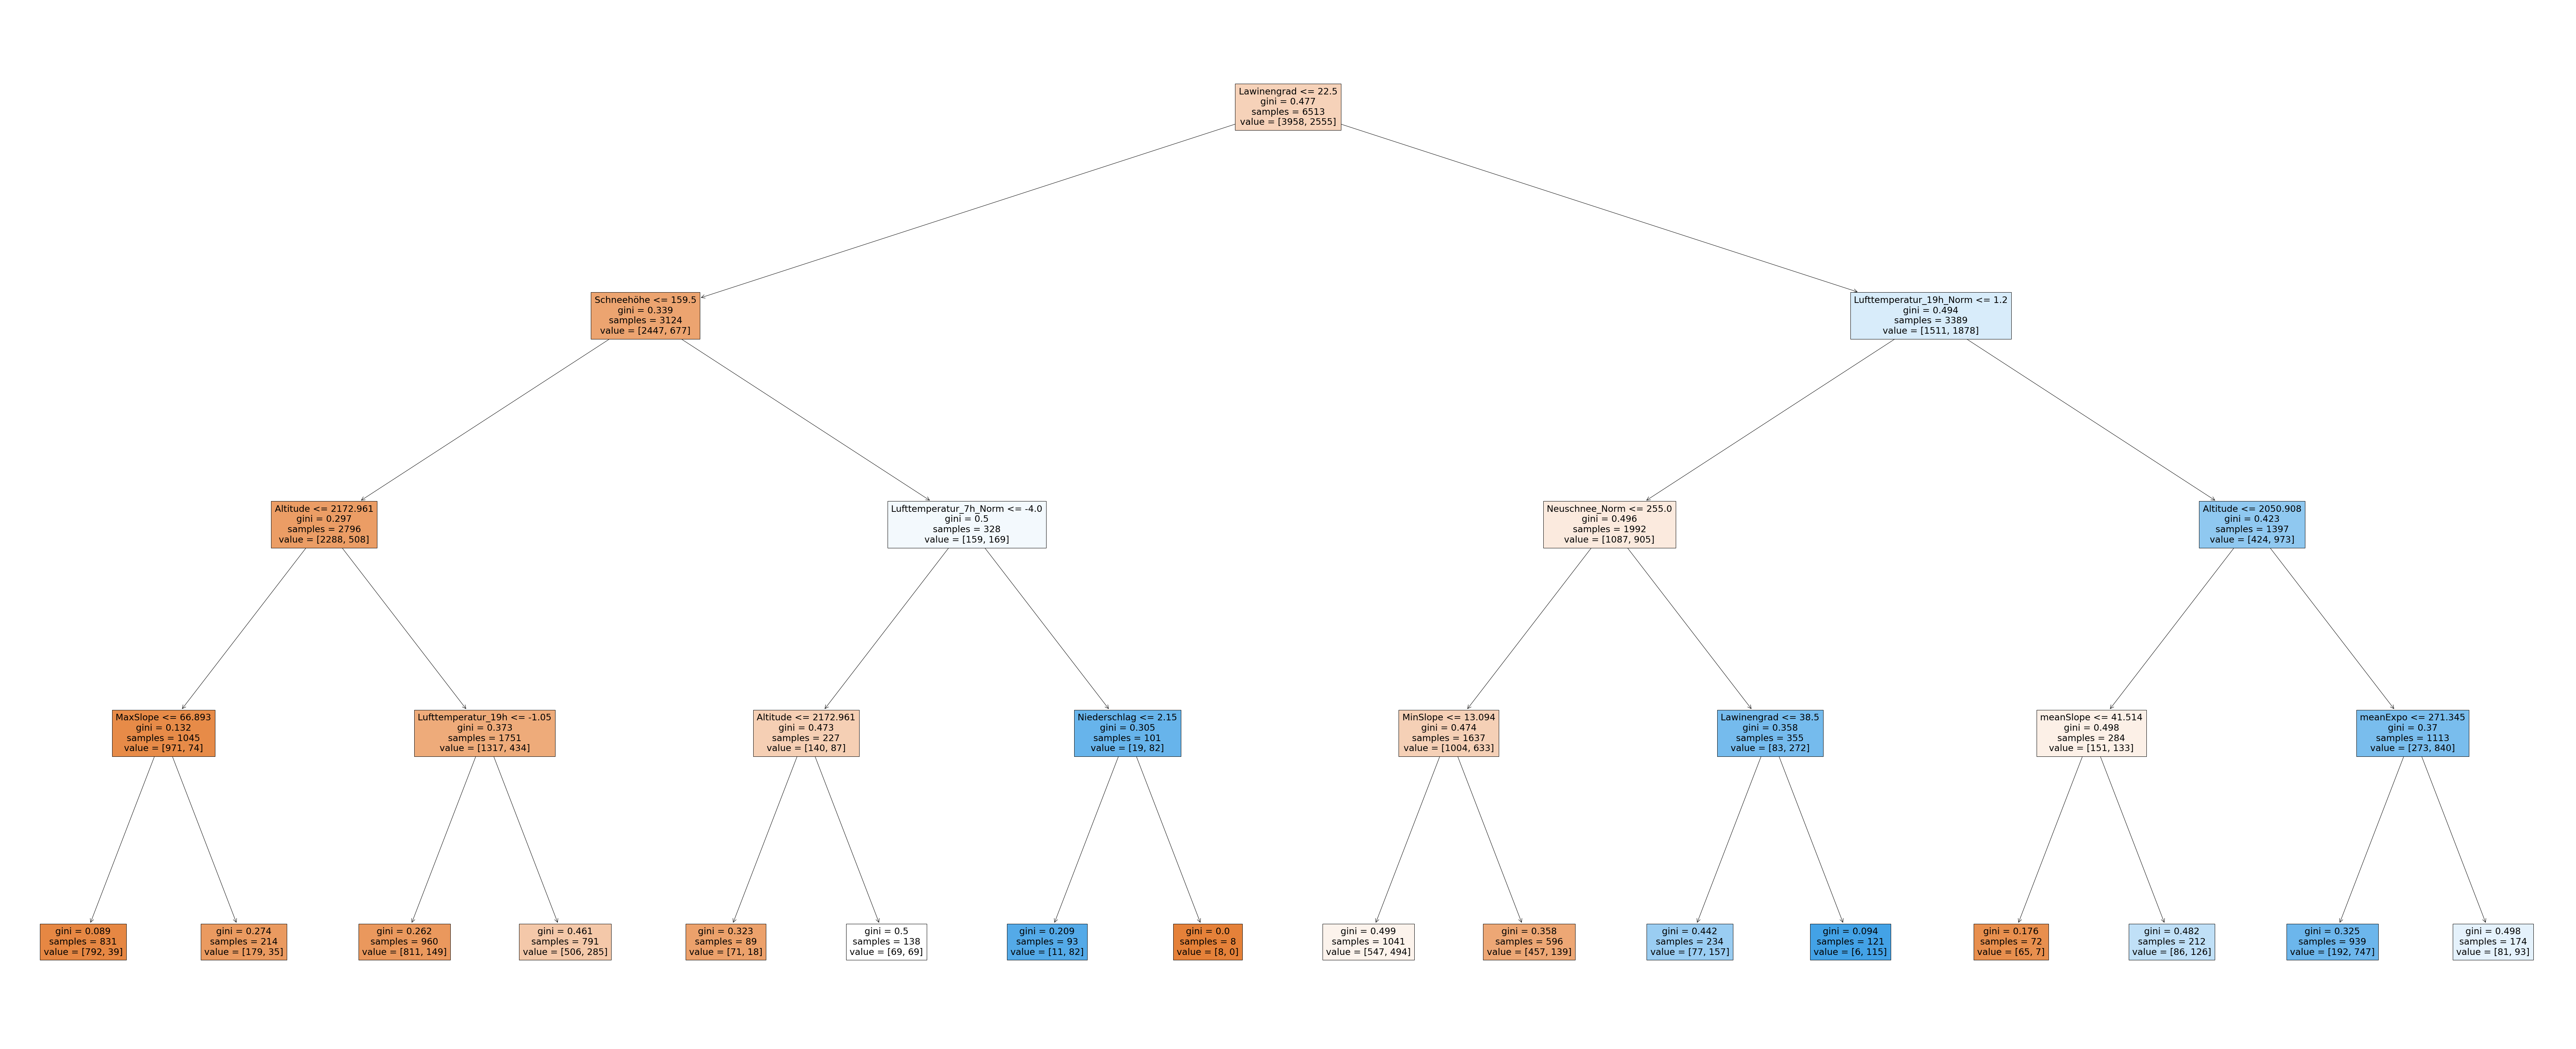

In [117]:
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

avalanche_set = copy.copy(lawinen_set)
avalanche_set['Avalanche'] =  avalanche_set['ID'].apply(lambda x: 1 if x > 0 else 0)
avalanche_set = avalanche_set.drop([ 'Lawinenabgänge', 'ID', 'Volumen', 'Lawinen_Art',], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [118]:
cross_val_score(dt, X, y, cv=5)

array([0.72524942, 0.7467383 , 0.71066769, 0.72043011, 0.71735791])

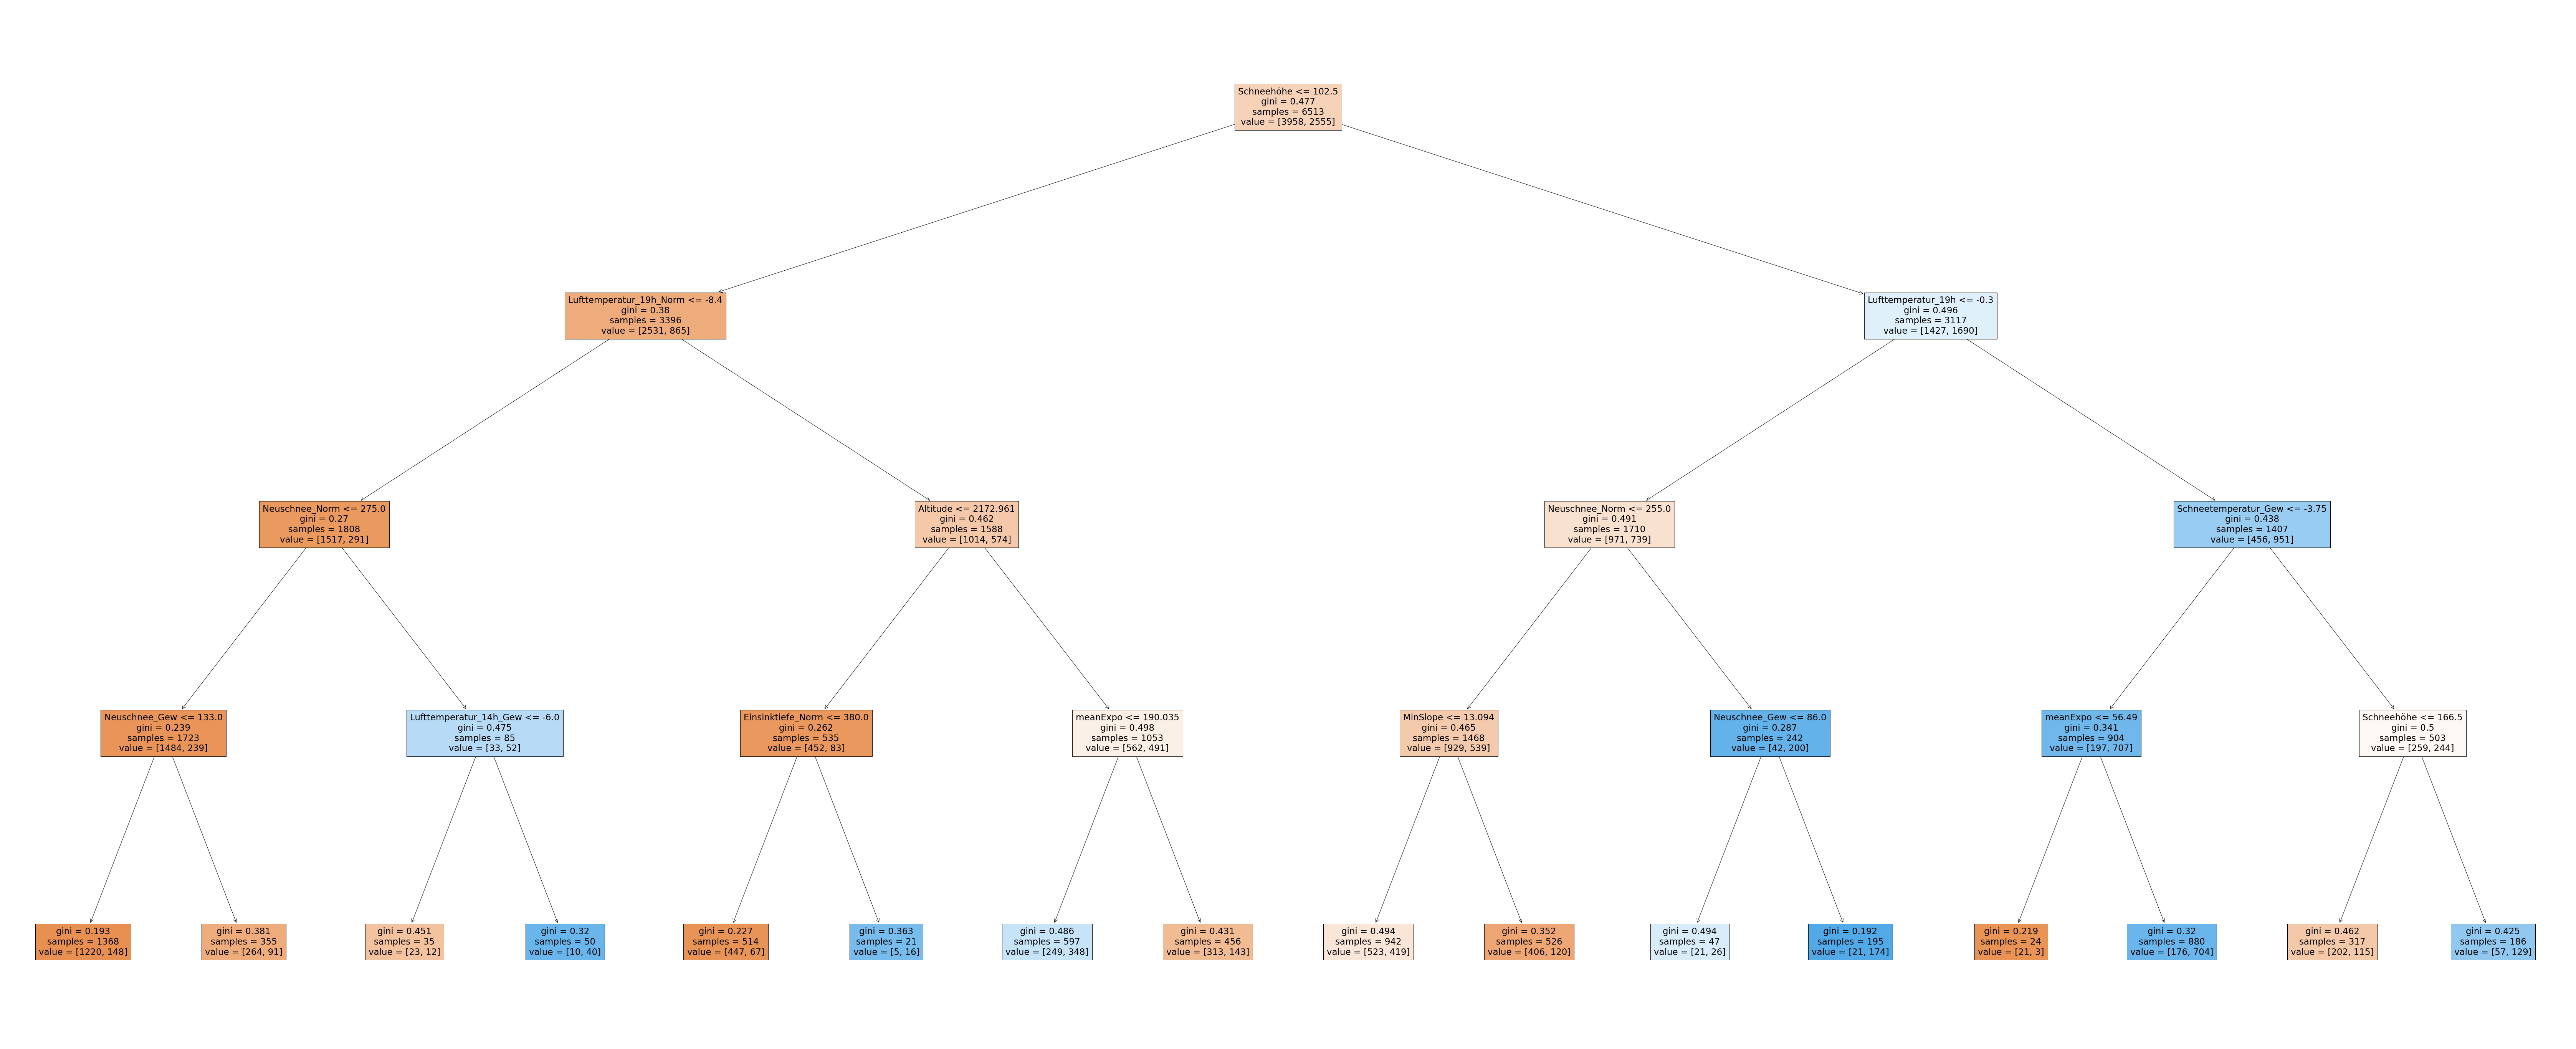

In [119]:
avalanche_set = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [120]:
cross_val_score(dt, X, y, cv=5)

array([0.65771297, 0.71910975, 0.66462011, 0.71044547, 0.71966206])

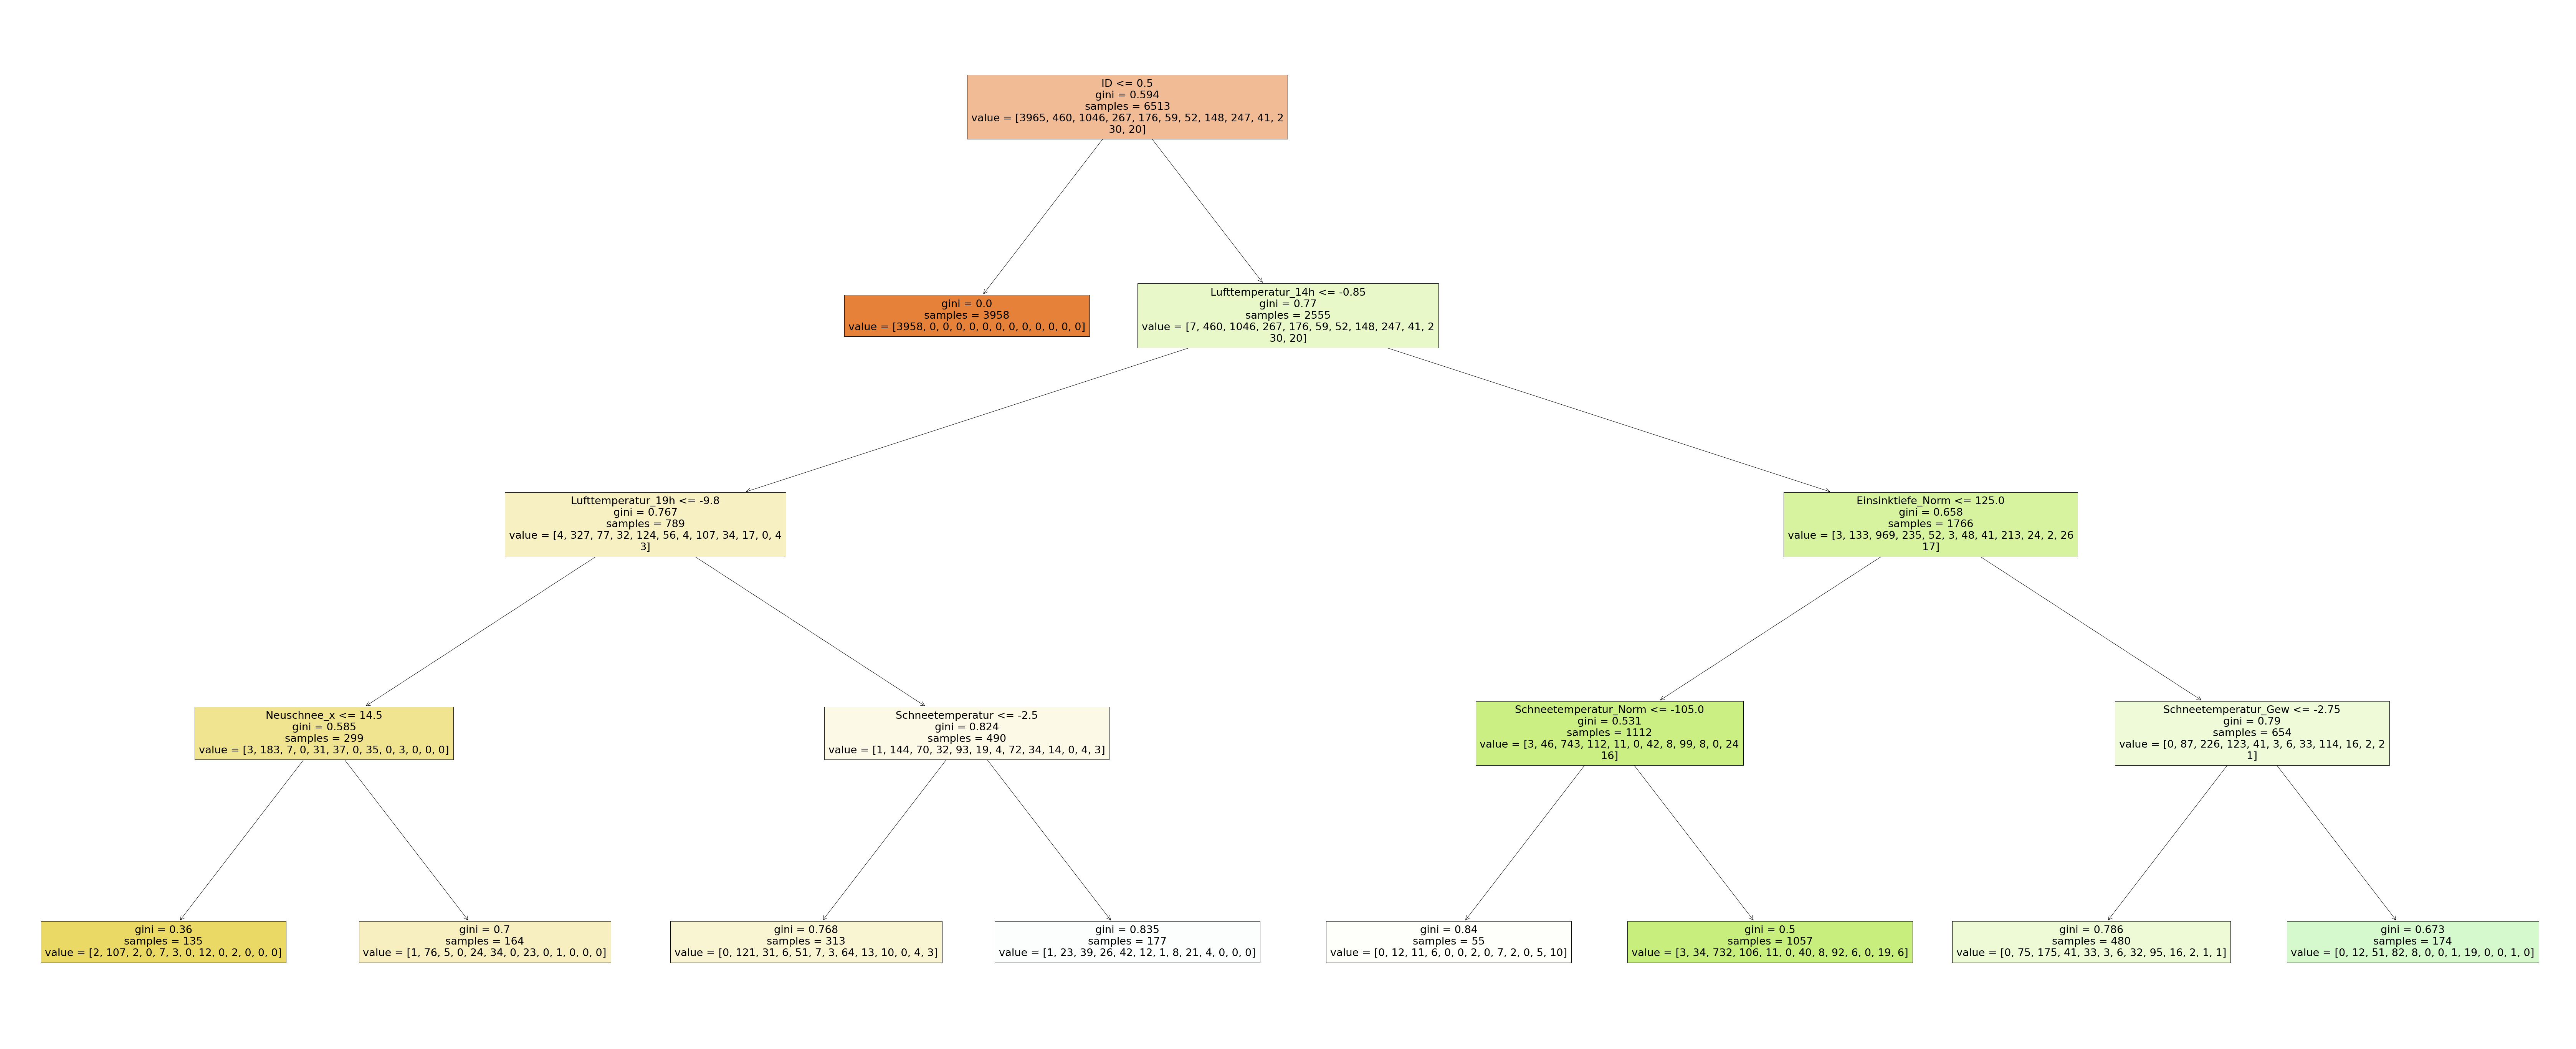

In [121]:
lawinen_set = lawinen_set.drop(['Volumen', 'Lawinenabgänge'], axis=1)

feature_names = lawinen_set.columns.drop('Lawinen_Art')
X = lawinen_set[lawinen_set.columns.drop('Lawinen_Art')]
y = lawinen_set['Lawinen_Art']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()